# Project: Wealth and Health - Are economic powerful countries healthier?

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Does the economic wealth of a country increase the health of its population? As we know, the economic strength and the income per capita is not evenly distributed over the world. Regions in first world countries hosting globally operating enterprises are capable to provide higher economic growth and, thus, a higher gross domestic product (GDP) as in third world problems. Additionally, health crises in less developed states are reported due to the lack of medical treatment and sanitation infrastructure. However, there are also risk factors in industry nations causing health problems and diseases.
This project will focus on the impact of economic power indicated by the GDP and the income on health related issues. Therefor, several datasets given by [Gapminder](https://www.gapminder.org/data/) are explored and analyzed to answer fundamental questions within the scope of economy and health. The main questions are as follows:
- What is the influence of economic power on the health of the population?
    - Does a higher income per capita increase the life expectancy in different countries in the world?
    - What is the influence of wealth and child mortality?
    - Does a higher GDP result in a higher spending on medical treatment and a more developed sanitation infrastructure?
- Which diseases are more common in first and third world countries?
    - Does a higher living standard as a result of wealth decrease the occurrence of diseases in general?
    - Are there any exceptions? 
    - Which risk factors occur more frequently in different regions of the world? Are there any dependencies on income or GDP?

In general, it is hypothesised that economic power has an essential positive affect on the health of the people resulting in a higher life expectancy and less occurrences of diseases.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
% matplotlib inline

def CreateDataFrameFromExcel(path,sheet,col_name_replace,regions):
    df = pd.read_excel(path,sheet_name=sheet,header=0,)
    print('Original Shape: ', df.shape)
    df.rename(columns={col_name_replace:'country'},inplace=True)
    df.set_index('country',inplace=True)
    n = df.size
    delete_rows = []
    for i, row in df.iterrows():
        if i not in regions:
            delete_rows.append(i)
    df.drop(delete_rows, inplace=True)
    print('New shape: ', df.shape)
    return df

def MeanByRegionDataFrame(df):
    indicators = list(df.columns)
    regions = df['four_regions'].unique()
    df_mean = pd.DataFrame(index=regions,columns=indicators[1:])
    for region in regions:
        for indicator in indicators[1:]:
            df_mean[indicator][region] =  df.groupby('four_regions').mean()[indicator][region]
    return df_mean

def ReplaceNaNByMean(df,df_mean):
    for indicator in df.columns[1:]:
        df[indicator] = df.apply(lambda row: df_mean[indicator].loc[row['four_regions']] if np.isnan(row[indicator]) else row[indicator],axis=1)
    return df

<a id='wrangling'></a>
## Data Wrangling

### General Properties
[Gapminder](https://www.gapminder.org/data/) provides data regarding indicators in the field of economy, population, infrastructure and many more for different countries in the world. The data is given in .xlsx-files. Each Excel file contains information on one indicator over time (yearly) for every country. Additionally, the Excel-file holds further information on the data in sheets. Thus, we have to apply the pandas' *read_excel()*-function instead of the *read_csv()*-function to import the data. This function is advanced by some other features by using the defined function CreateDataFrameFromExcel(). This function additionally sets the countries as an index column and delete rows of countries which are not in the regions dataset. This dataset contains a list of currently existing countries and their specific region.

To analyze various indicators of different research areas, we have to combine the data imported from Excel files into different dataframes. Therefor, we have to be aware of the right year the data is given, since each indicator has different up-to-dateness. To handle this problem, we consider the independent variables *income* and *total_GDP* for different years and countries in each dataframe. 
The *health indicators*, *cancer death data* and *risk factors* are only considered for the most recent year the data was recorded or the most recent year the data can be compared to the dependent variables (e.g. the data for *total_GDP* is only available until 2011). These three groups of indicators are stored stored separatly in three dataframes. The index of each dataframe is given by the country. The content is comprised as follows:
- *health_indicators* (year = 2010/2011):
    - *region* (specfic regions of the country: europe, america, asia or africa)
    - *income* (GDP per capita by Purchasing Power Parities (in international dollars (PPP Dollars), inflation-adjusted)
    - *total_GDP* (Total income (GDP, in constant exchange rate US Dollars))
    - *life_expectancy* (The average number of years a newborn would live at current mortality patterns)
    - *child_mortality* (The probability that a child will die before reaching the age of five in rate per 1,000 live births)
    - *health_spending* (Per capita total expenditure on health at average exchange rate in US Dollars)
    - *sanitation* (Access to improved sanitation in percentage of the population)


- *cancer* (Number of cancer death per 100,000 women / men, year = 2002):
    - *region* (specfic regions of the country: europe, america, asia or africa)
    - *income* (GDP per capita by Purchasing Power Parities (in international dollars (PPP Dollars), inflation-adjusted)
    - *total_GDP* (Total income (GDP, in constant exchange rate US Dollars))
    - *breast_cancer_female* (Breast cancer deaths, women)
    - *cervical_cancer_female* (Cervical cancer deaths, women)
    - *colon_cancer_female* (Colon & rectum cancer deaths, women)
    - *liver_cancer_female* (liver cancer deaths, women)
    - *lung_cancer_female* (Lung cancer deaths, women)
    - *stomach_cancer_female* (Stomach cancer deaths, women)
    - *colon_cancer_male* (Colon & rectum cancer deaths, men)
    - *liver_cancer_male* (liver cancer deaths, men)
    - *lung_cancer_male* (Lung cancer deaths, men)
    - *prostate_cancer_male* (Prostate cancer deaths, men)    
    - *stomach_cancer_male* (Stomach cancer deaths, men)
    
    
- *risk_factors* (year = 2008):
    - *region* (specfic regions of the country: europe, america, asia or africa)
    - *income* (GDP per capita by Purchasing Power Parities (in international dollars (PPP Dollars), inflation-adjusted)
    - *total_GDP* (Total income (GDP, in constant exchange rate US Dollars))
    - *alc_consumption* (Alcohol consumption per adult 15 + in litres)
    - *BMI_female* (Body Mass Index, women, in kg/m^2)
    - *BMI_male* (Body Mass Index, men, in kg/m^2)
    - *fat_female* (Fat in blood, women, in Cholesterol mmol/L)
    - *fat_male* (Fat in blood, men, in Cholesterol mmol/L)
    - *smoking* (Smoking adults 15+ in percentage of population)
 
To easily load the filtered and wrangled data of the indicators and countries, each dataframe is saved as a .csv-file.



In [3]:
# Load geographical data to assign the given countries to the region they belong to. 
#   We regard four geographical regions: europe, asia, americas and africa.

regions = pd.read_excel('excel/Data Geographies - v1 - by Gapminder.xlsx',sheet_name='List of countries',header=0,index_col='country')
regions = regions['four_regions']
# Check weather the dataframe contains any NaN or NULL values and save as .csv-file
print('Number of NaN values: ', regions.isnull().sum())
print('Shape: ', regions.shape)
regions.to_csv('regions.csv')
regions.head()

Number of NaN values:  0
Shape:  (197,)


country
Afghanistan      asia
Albania        europe
Algeria        africa
Andorra        europe
Angola         africa
Name: four_regions, dtype: object

In [4]:
# Load independent variable total GPD of each country over time
total_GDP = CreateDataFrameFromExcel('excel/indicator GDP at market prices, constant 2000 US$.xlsx','Data','GDP (constant 2000 US$)',regions)
total_GDP.head()

Original Shape:  (270, 53)
New shape:  (196, 52)


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.059112e+09,4.290481e+09,4.543619e+09,4.793518e+09,5.033194e+09,5.330153e+09,5.740575e+09,5.930013e+09,6.137564e+09,6.321691e+09
Algeria,1.382815e+10,1.194677e+10,9.595044e+09,1.288746e+10,1.364001e+10,1.448664e+10,1.379056e+10,1.509417e+10,1.672378e+10,1.813414e+10,...,5.885669e+10,6.291780e+10,6.618952e+10,6.956519e+10,7.095649e+10,7.308519e+10,7.483923e+10,7.663537e+10,7.916434e+10,8.114345e+10
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.341509e+09,1.432120e+09,1.524990e+09,1.615237e+09,1.724911e+09,1.749544e+09,1.812015e+09,NaN,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.078045e+10,1.113710e+10,1.238254e+10,1.464378e+10,1.768017e+10,2.167467e+10,2.466948e+10,2.526473e+10,2.612566e+10,2.701394e+10


In [5]:
# There are a lot of NaN values within the dataframe total_GDP.
#   We want to eliminate the NaNs by replacing them with an linear interpolation of the provided data elements.
#   Rows which do not have any data will be deleted.
#   Save final Dataframe as a csv-file.
total_GDP.interpolate(method='linear',axis=0,inplace=True)
total_GDP.dropna(axis=0,inplace=True)
total_GDP = pd.merge(regions.to_frame(),total_GDP,left_index=True,right_index=True)
total_GDP.to_csv('total_GDP.csv')
print('Number of NaN: ', total_GDP.isnull().sum().sum())
total_GDP.head()

Number of NaN:  0


,four_regions,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
country,,,,,,,,,,,,,,,,,,,,,
Algeria,africa,1.382815e+10,1.194677e+10,9.595044e+09,1.288746e+10,1.364001e+10,1.448664e+10,1.379056e+10,1.509417e+10,1.672378e+10,...,5.885669e+10,6.291780e+10,6.618952e+10,6.956519e+10,7.095649e+10,7.308519e+10,7.483923e+10,7.663537e+10,7.916434e+10,8.114345e+10
Andorra,europe,3.745170e+10,3.751055e+10,3.550350e+10,3.647021e+10,3.975001e+10,4.350507e+10,4.276768e+10,4.478039e+10,4.761619e+10,...,1.341509e+09,1.432120e+09,1.524990e+09,1.615237e+09,1.724911e+09,1.749544e+09,1.812015e+09,5.095005e+10,5.264500e+10,5.407869e+10
Angola,africa,6.107524e+10,6.307433e+10,6.141196e+10,6.005296e+10,6.586001e+10,7.252351e+10,7.174480e+10,7.446661e+10,7.850860e+10,...,1.078045e+10,1.113710e+10,1.238254e+10,1.464378e+10,1.768017e+10,2.167467e+10,2.466948e+10,2.526473e+10,2.612566e+10,2.701394e+10
Antigua and Barbuda,americas,8.469878e+10,8.863811e+10,8.732041e+10,8.363571e+10,9.197001e+10,1.015420e+11,1.007219e+11,1.041528e+11,1.094010e+11,...,8.409727e+08,8.836182e+08,9.457703e+08,9.853788e+08,1.116208e+09,1.009354e+09,1.024206e+09,9.182453e+08,8.366868e+08,8.017879e+08
Argentina,americas,1.083223e+11,1.142019e+11,1.132289e+11,1.072185e+11,1.180800e+11,1.305604e+11,1.296991e+11,1.338390e+11,1.402934e+11,...,2.420762e+11,2.634686e+11,2.872587e+11,3.136260e+11,3.401778e+11,3.696145e+11,3.945947e+11,3.979497e+11,4.344055e+11,4.729353e+11


In [6]:
# Load independent variable income of each country over time
income = CreateDataFrameFromExcel('excel/indicator gapminder gdp_per_capita_ppp.xlsx','Data','GDP per capita',regions)
income.head()

Original Shape:  (262, 217)
New shape:  (196, 216)


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,724.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0
Andorra,1197.0,1199.0,1201.0,1204.0,1206.0,1208.0,1210.0,1212.0,1215.0,1217.0,...,42738.0,43442.0,41426.0,41735.0,38982.0,41958.0,41926.0,43735.0,44929.0,46577.0
Angola,618.0,620.0,623.0,626.0,628.0,631.0,634.0,637.0,640.0,642.0,...,5445.0,6453.0,7103.0,7039.0,7047.0,7094.0,7230.0,7488.0,7546.0,7615.0


In [7]:
# There are some NaN values within the dataframe income.
#   We want to eliminate the NaNs by replacing them with an linear interpolation of the provided data elements.
#   Save final Dataframe as a csv-file and verify that no NaN values are in the dataframe.
income.interpolate(method='linear',axis=0,inplace=True)
income = pd.merge(regions.to_frame(),income,left_index=True,right_index=True)
income.to_csv('income.csv')
print('Number of NaN: ', income.isnull().sum().sum())
income.head()

Number of NaN:  0


,four_regions,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,asia,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
Albania,europe,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
Algeria,africa,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0
Andorra,europe,1197.0,1199.0,1201.0,1204.0,1206.0,1208.0,1210.0,1212.0,1215.0,...,42738.0,43442.0,41426.0,41735.0,38982.0,41958.0,41926.0,43735.0,44929.0,46577.0
Angola,africa,618.0,620.0,623.0,626.0,628.0,631.0,634.0,637.0,640.0,...,5445.0,6453.0,7103.0,7039.0,7047.0,7094.0,7230.0,7488.0,7546.0,7615.0


In [8]:
# In the next step all indicators are imported as a dataframe by using the created function CreateDataFromExcel()
# 1st Life expectancy
life_expectancy = CreateDataFrameFromExcel('excel/indicator life_expectancy_at_birth.xlsx','Data','Life expectancy',regions)
life_expectancy.head()

Original Shape:  (260, 218)
New shape:  (196, 217)


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84.5,84.6,84.6,84.7,84.7,84.7,84.8,84.8,84.8,84.80
Angola,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,...,56.2,56.7,57.1,57.6,58.1,58.5,58.8,59.2,59.6,60.00


In [9]:
# 2nd Child mortality
child_mortality = CreateDataFrameFromExcel('excel/indicator gapminder under5mortality.xlsx','Data','Under five mortality',regions)
child_mortality.head()

Original Shape:  (275, 217)
New shape:  (196, 216)


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,468.58,468.58,468.58,468.58,468.58,468.58,469.98,469.98,469.98,469.98,...,116.3,113.2,110.4,107.6,105.0,102.3,99.5,96.7,93.9,91.1
Albania,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,...,19.5,18.7,17.9,17.3,16.6,16.0,15.5,14.9,14.4,14.0
Algeria,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,...,32.1,30.7,29.5,28.4,27.4,26.6,25.8,25.2,24.6,24.0
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.7,3.6,3.5,3.4,3.3,3.2,3.1,3.0,2.9,2.8
Angola,485.68,485.68,485.68,485.68,485.68,485.68,485.68,485.68,485.68,485.68,...,200.5,196.4,192.0,187.3,182.5,177.3,172.2,167.1,162.2,156.9


In [10]:
# 3rd Health Spending
health_spending = CreateDataFrameFromExcel('excel/indicator health spending per person (US $).xlsx','Data','Per capita total expenditure on health at average exchange rate (US$)',regions)
health_spending.head()

Original Shape:  (262, 17)
New shape:  (196, 16)


,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.818293,18.312764,20.665594,21.859666,23.820132,28.808767,31.809727,33.710308,37.666786
Albania,27.910805,43.045818,36.135184,47.102142,65.024024,75.236623,79.862222,90.264318,113.005324,160.909881,177.633315,191.779729,232.180439,275.142520,259.582585,240.824785
Algeria,62.055538,61.769883,66.893742,65.983195,62.521470,62.607389,67.814013,69.924657,79.623436,88.985323,96.149135,109.845806,140.850971,185.848234,180.544271,178.245066
Andorra,1392.178253,1506.720150,1460.073541,1857.622689,1424.631803,1330.411302,1293.948961,1485.790128,1891.384128,2193.360689,2355.660240,2631.377069,3011.773219,3391.470029,3364.327079,3099.413225
Angola,15.568388,11.344381,13.516758,9.101512,8.825158,15.792295,21.425847,18.149774,23.889953,25.861014,36.409794,64.123932,85.293081,148.878817,201.257016,123.201096


In [11]:
# 4th Sanitation
sanitation = CreateDataFrameFromExcel('excel/Indicator_Improved sanitation total percent.xlsx','Data','Proportion of the population using improved sanitation facilities, total',regions)
sanitation.head()

Original Shape:  (275, 22)
New shape:  (196, 21)


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,29.0,29.0,29.0,29.0,29.0,29.0,30.0,30.0,31.0,...,32.0,33.0,34.0,34.0,35.0,35.0,37.0,37.0,37.0,37.0
Albania,76.0,76.0,77.0,77.0,77.0,78.0,79.0,80.0,81.0,82.0,...,85.0,86.0,87.0,88.0,90.0,91.0,91.0,93.0,94.0,94.0
Algeria,88.0,89.0,89.0,89.0,90.0,90.0,90.0,91.0,91.0,92.0,...,92.0,93.0,93.0,93.0,94.0,94.0,94.0,95.0,95.0,95.0
Andorra,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
Angola,29.0,29.0,30.0,31.0,33.0,34.0,36.0,38.0,39.0,41.0,...,44.0,46.0,47.0,49.0,51.0,52.0,54.0,55.0,57.0,58.0


In [12]:
# 5th Breast Cancer Deaths, female
breast_cancer_female = CreateDataFrameFromExcel('excel/indicator breast female mortality.xlsx','Data','Breast Female Mortality',regions)
breast_cancer_female.head()

Original Shape:  (176, 54)
New shape:  (163, 53)


,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.70
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.75,4.77,5.95,6.55,5.71,6.41,8.92,7.87,6.68,6.54
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.70
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.10
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.23,20.90,21.12,21.84,21.00,20.71,20.21,20.25,20.20,19.42


In [13]:
# 6th Cervical Cancer Deaths, female
cervical_cancer_female = CreateDataFrameFromExcel('excel/indicator cervix female mortality.xlsx','Data','Cervix Female Mortality',regions)
cervical_cancer_female.head()

Original Shape:  (176, 54)
New shape:  (163, 53)


,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.60
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.33,0.65,0.50,1.31,1.17,0.69,0.51,1.26,0.79,1.19
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.70
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.20
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.68,4.23,4.39,4.72,4.79,4.47,4.51,4.32,4.48,4.45


In [14]:
# 7th Colon and Rectum Cancer Deaths, female
colon_cancer_female = CreateDataFrameFromExcel('excel/indicator colon and rectum female mortality.xlsx','Data','Colon & Rectum Female Mortality',regions)
colon_cancer_female.head()

Original Shape:  (176, 49)
New shape:  (163, 48)


,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.80
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.95,1.29,1.97,1.71,2.32,3.03,2.49,2.23,2.33,2.84
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.60
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.80
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.01,9.49,9.00,9.29,8.80,8.97,9.06,9.02,8.85,8.80


In [15]:
# 8th Liver Cancer Deaths, female
liver_cancer_female = CreateDataFrameFromExcel('excel/indicator liver female mortality.xlsx','Data','Liver Female Mortality',regions)
liver_cancer_female.head()

Original Shape:  (176, 49)
New shape:  (163, 48)


,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.30
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.60
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.34,3.31,3.16,3.01,3.28,2.97,2.88,3.09,2.72,2.84


In [16]:
# 9th Lung Cancer Deaths, female
lung_cancer_female = CreateDataFrameFromExcel('excel/indicator lung female mortality.xlsx','Data','Lung Female Mortality',regions)
lung_cancer_female.head()

Original Shape:  (176, 54)
New shape:  (163, 53)


,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.70
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.79,5.09,5.79,7.80,7.62,7.84,7.38,6.40,5.88,8.10
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.30
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.38,6.42,6.29,6.46,6.50,7.09,7.05,6.73,6.95,7.08


In [17]:
# 10th Stomach Cancer Deaths, female
stomach_cancer_female = CreateDataFrameFromExcel('excel/indicator stomach female mortality.xlsx','Data','Stomach Female Mortality',regions)
stomach_cancer_female.head()

Original Shape:  (176, 54)
New shape:  (163, 53)


,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.30
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.07,4.01,5.69,8.02,6.41,7.35,7.62,7.24,6.82,6.65
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.10
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.32,4.45,4.17,4.27,4.16,3.98,3.95,3.65,3.63,3.45


In [18]:
# 11th Colon and Rectum Cancer Deaths, male
colon_cancer_male = CreateDataFrameFromExcel('excel/indicator colon and rectum male mortality.xlsx','Data','Colon & Rectum Male Mortality',regions)
colon_cancer_male.head()

Original Shape:  (176, 49)
New shape:  (163, 48)


,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.30
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.63,2.42,3.81,3.66,2.54,2.88,3.27,2.6,2.88,3.27
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.10
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.54,13.96,14.00,14.27,14.49,14.21,14.62,14.7,14.86,13.76


In [19]:
# 12th Liver Cancer Deaths, male
liver_cancer_male = CreateDataFrameFromExcel('excel/indicator liver male mortality.xlsx','Data','Liver Male Mortality',regions)
liver_cancer_male.head()

Original Shape:  (176, 49)
New shape:  (163, 48)


,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.50
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.60
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.80
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.20
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.25,4.91,4.78,4.99,5.32,4.85,4.92,4.9,4.76,4.58


In [20]:
# 13th Lung Cancer Deaths, male
lung_cancer_male = CreateDataFrameFromExcel('excel/indicator lung male mortality.xlsx','Data','Lung Male Mortality',regions)
lung_cancer_male.head()

Original Shape:  (176, 54)
New shape:  (163, 53)


,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.30
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.43,21.83,33.68,35.57,35.98,34.84,34.67,31.48,27.91,29.44
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.40
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.00
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.77,37.88,36.80,36.97,36.00,35.99,36.12,34.74,32.92,31.87


In [21]:
# 14th Prostate Cancer Deaths, male
prostate_cancer_male = CreateDataFrameFromExcel('excel/indicator prostate male mortality.xlsx','Data','Prostate Male Mortality',regions)
prostate_cancer_male.head()

Original Shape:  (176, 54)
New shape:  (163, 53)


,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.80
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.86,7.12,5.81,8.21,6.73,7.91,10.07,10.17,7.18,8.39
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.80
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.10
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.23,14.47,15.49,16.33,16.28,17.33,16.49,16.23,15.91,15.61


In [22]:
# 15th Stomach Cancer Deaths, male
stomach_cancer_male = CreateDataFrameFromExcel('excel/indicator stomach male mortality.xlsx','Data','Stomach Male Mortality',regions)
stomach_cancer_male.head()

Original Shape:  (176, 54)
New shape:  (163, 53)


,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.80
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.12,10.32,14.79,16.13,15.48,15.99,15.76,15.84,12.08,13.86
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.60
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.30
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.66,10.76,10.81,10.86,10.20,10.03,10.20,9.85,9.30,9.15


In [23]:
# 16th Alcohol Cosumption
alc_consumption = CreateDataFrameFromExcel('excel/indicator alcohol consumption  20100830.xlsx','Data','Alcohol Consumption',regions)
alc_consumption.head()

Original Shape:  (189, 25)
New shape:  (173, 24)


,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,0.03
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.68,NaN,NaN,7.29
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.96,NaN,NaN,0.69
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15.48,NaN,NaN,10.17
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.40,NaN,NaN,5.57


In [24]:
# 17th BMI, female
BMI_female = CreateDataFrameFromExcel('excel/Indicator_BMI female ASM.xlsx','Data','Country',regions)
BMI_female.head()

Original Shape:  (199, 30)
New shape:  (179, 29)


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,20.44348,20.47765,20.52292,20.56493,20.60867,20.64796,20.68983,20.70902,20.71512,20.71421,...,20.61717,20.61850,20.61353,20.65274,20.70828,20.76927,20.83858,20.91021,20.99060,21.07402
Albania,25.17427,25.19088,25.20032,25.21906,25.22359,25.21257,25.20939,25.18918,25.16965,25.15370,...,25.06254,25.12797,25.20332,25.27082,25.33198,25.39804,25.46525,25.53328,25.59394,25.65726
Algeria,23.67764,23.80702,23.92626,24.03604,24.13630,24.24213,24.33652,24.42523,24.50904,24.59436,...,25.40139,25.49389,25.59477,25.69948,25.81168,25.93081,26.03886,26.15054,26.26096,26.36841
Andorra,25.67324,25.69018,25.69922,25.70089,25.70584,25.70877,25.71239,25.72437,25.74523,25.77649,...,26.07432,26.10622,26.14707,26.19542,26.23892,26.28851,26.32247,26.36846,26.40095,26.43196
Angola,20.06763,20.12766,20.19464,20.26439,20.34110,20.42624,20.51389,20.60929,20.70945,20.80873,...,21.76054,21.91293,22.07646,22.26093,22.44571,22.63536,22.83412,23.04406,23.26330,23.48431


In [25]:
# 18th BMI, male
BMI_male = CreateDataFrameFromExcel('excel/Indicator_BMI male ASM.xlsx','Data','Country',regions)
BMI_male.head()

Original Shape:  (199, 30)
New shape:  (179, 29)


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,21.48678,21.46552,21.45145,21.43822,21.42734,21.41222,21.40132,21.37679,21.34018,21.29845,...,20.75469,20.69521,20.62643,20.59848,20.58706,20.57759,20.58084,20.58749,20.60246,20.62058
Albania,25.22533,25.23981,25.25636,25.27176,25.27901,25.28669,25.29451,25.30217,25.30450,25.31944,...,25.46555,25.55835,25.66701,25.77167,25.87274,25.98136,26.08939,26.20867,26.32753,26.44657
Algeria,22.25703,22.34745,22.43647,22.52105,22.60633,22.69501,22.76979,22.84096,22.90644,22.97931,...,23.69486,23.77659,23.86256,23.95294,24.05243,24.15957,24.27001,24.38270,24.48846,24.59620
Andorra,25.66652,25.70868,25.74681,25.78250,25.81874,25.85236,25.89089,25.93414,25.98477,26.04450,...,26.75078,26.83179,26.92373,27.02525,27.12481,27.23107,27.32827,27.43588,27.53363,27.63048
Angola,20.94876,20.94371,20.93754,20.93187,20.93569,20.94857,20.96030,20.98025,21.01375,21.05269,...,21.31954,21.37480,21.43664,21.51765,21.59924,21.69218,21.80564,21.93881,22.08962,22.25083


In [26]:
# 19th Cholesterol, female
fat_female = CreateDataFrameFromExcel('excel/Indicator_TC female ASM.xlsx','Data','TC female (mmol/L), age standardized mean',regions)
fat_female.head()

Original Shape:  (199, 30)
New shape:  (179, 29)


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,4.644476,4.637118,4.630770,4.625318,4.619873,4.613289,4.607698,4.598080,4.583443,4.567768,...,4.356148,4.333604,4.309802,4.295170,4.283724,4.271746,4.262364,4.253473,4.246427,4.239035
Albania,5.039529,5.036610,5.033352,5.028138,5.022292,5.018456,5.012306,5.008334,5.002822,4.998255,...,4.916494,4.917402,4.919429,4.918646,4.915379,4.909980,4.902183,4.895111,4.888237,4.881235
Algeria,4.976215,4.975257,4.974508,4.976556,4.976963,4.977419,4.974378,4.971097,4.963965,4.957217,...,4.873433,4.866559,4.857580,4.848951,4.841351,4.836602,4.831645,4.826501,4.821301,4.815735
Andorra,6.132187,6.101291,6.069412,6.038793,6.008447,5.977998,5.948506,5.918512,5.890226,5.864313,...,5.592350,5.568902,5.548213,5.529060,5.513778,5.499101,5.484156,5.474519,5.465222,5.456065
Angola,4.789354,4.769557,4.751330,4.733550,4.719231,4.707431,4.693793,4.683528,4.674458,4.665655,...,4.511637,4.505080,4.499903,4.499115,4.498331,4.498226,4.501854,4.508352,4.517577,4.528061


In [27]:
# 20th Cholesterol, male
fat_male = CreateDataFrameFromExcel('excel/Indicator_TC male ASM.xlsx','Data','TC male (mmol/L), age standardized mean',regions)
fat_male.head()

Original Shape:  (199, 30)
New shape:  (179, 29)


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,4.582847,4.575943,4.570482,4.566239,4.561473,4.555119,4.550215,4.540510,4.524835,4.507305,...,4.251635,4.221958,4.190959,4.171098,4.155508,4.139688,4.127613,4.115781,4.106099,4.095997
Albania,5.006371,5.001727,4.995893,4.988104,4.981580,4.977619,4.971681,4.968798,4.964878,4.961949,...,4.895632,4.898920,4.903275,4.905689,4.906776,4.904870,4.900919,4.897351,4.894249,4.890784
Algeria,4.925933,4.919521,4.914258,4.913837,4.911134,4.907856,4.901825,4.895566,4.884584,4.872994,...,4.743488,4.734174,4.722526,4.711596,4.701297,4.694086,4.686355,4.678111,4.671032,4.663696
Andorra,6.178972,6.143850,6.108996,6.077504,6.047321,6.018569,5.991545,5.964697,5.941315,5.921647,...,5.691342,5.671508,5.653838,5.636606,5.623507,5.609258,5.594193,5.582063,5.570358,5.557206
Angola,4.524107,4.509693,4.496962,4.484571,4.475721,4.469586,4.461452,4.457127,4.454220,4.451282,...,4.325931,4.322815,4.321519,4.325346,4.330437,4.336073,4.346258,4.359311,4.375734,4.393710


In [28]:
# 21th Smoking
smoking = CreateDataFrameFromExcel('excel/indicator_prevalence of current tobacco use among adults (%) both sexes.xlsx','Data','Prevalence of current tobacco use among adults (>=15 years) (%) both sexes',regions)
smoking.head()

Original Shape:  (192, 3)
New shape:  (179, 2)


,2002,2005
country,,
Algeria,15.2,15.2
Angola,NaN,NaN
Benin,NaN,NaN
Botswana,NaN,NaN
Burkina Faso,16.6,16.6


In [29]:
# Extract the most recent column of each indicator that can be compared to the independent variables.
#   Create a dataframe for health indicators, cancer deaths and risk factors as well as
#   the regions of the countries and the independent variables total_GDP and income (both from 2011)

# Merge dataframes to health indicator dataframe
health_indicators = pd.merge(regions.to_frame(),income.loc[:,[2011]],left_index=True,right_index=True)
health_indicators.rename(columns={2011:'income'},inplace=True)
health_indicators = pd.merge(health_indicators,total_GDP.loc[:,[2011]],left_index=True,right_index=True)
health_indicators.rename(columns={2011:'total_GDP'},inplace=True)
health_indicators = pd.merge(health_indicators,life_expectancy.loc[:,[2011]],left_index=True,right_index=True)
health_indicators.rename(columns={2011:'life_expectancy'},inplace=True)
health_indicators = pd.merge(health_indicators,child_mortality.loc[:,[2011]],left_index=True,right_index=True)
health_indicators.rename(columns={2011:'child_mortality'},inplace=True)
health_indicators = pd.merge(health_indicators,health_spending.loc[:,[2010]],left_index=True,right_index=True)
health_indicators.rename(columns={2010:'health_spending'},inplace=True)
health_indicators = pd.merge(health_indicators,sanitation.loc[:,['2010']],left_index=True,right_index=True)
health_indicators.rename(columns={'2010':'sanitation'},inplace=True)

print("Shape: ", health_indicators.shape)
health_indicators.to_csv('health_indicators.csv')
health_indicators.head()

Shape:  (194, 7)


,four_regions,income,total_GDP,life_expectancy,child_mortality,health_spending,sanitation
country,,,,,,,
Algeria,africa,12606.0,8.114345e+10,76.1,26.6,178.245066,95.0
Andorra,europe,41958.0,5.407869e+10,84.7,3.2,3099.413225,100.0
Angola,africa,7094.0,2.701394e+10,58.1,177.3,123.201096,58.0
Antigua and Barbuda,americas,19988.0,8.017879e+08,75.9,9.5,689.686692,NaN
Argentina,americas,16972.0,4.729353e+11,76.0,14.2,741.832979,NaN


In [30]:
# Merge dataframes to cancer death dataframe
cancer = pd.merge(regions.to_frame(),income.loc[:,[2002]],left_index=True,right_index=True)
cancer.rename(columns={2002:'income'},inplace=True)
cancer = pd.merge(cancer,total_GDP.loc[:,[2002]],left_index=True,right_index=True)
cancer.rename(columns={2002:'total_GDP'},inplace=True)
cancer = pd.merge(cancer,breast_cancer_female.loc[:,[2002]],left_index=True,right_index=True)
cancer.rename(columns={2002:'breast_cancer_female'},inplace=True)
cancer = pd.merge(cancer,cervical_cancer_female.loc[:,[2002]],left_index=True,right_index=True)
cancer.rename(columns={2002:'cervical_cancer_female'},inplace=True)
cancer = pd.merge(cancer,colon_cancer_female.loc[:,[2002]],left_index=True,right_index=True)
cancer.rename(columns={2002:'colon_cancer_female'},inplace=True)
cancer = pd.merge(cancer,liver_cancer_female.loc[:,[2002]],left_index=True,right_index=True)
cancer.rename(columns={2002:'liver_cancer_female'},inplace=True)
cancer = pd.merge(cancer,lung_cancer_female.loc[:,[2002]],left_index=True,right_index=True)
cancer.rename(columns={2002:'lung_cancer_female'},inplace=True)
cancer = pd.merge(cancer,stomach_cancer_female.loc[:,[2002]],left_index=True,right_index=True)
cancer.rename(columns={2002:'stomach_cancer_female'},inplace=True)
cancer = pd.merge(cancer,colon_cancer_male.loc[:,[2002]],left_index=True,right_index=True)
cancer.rename(columns={2002:'colon_cancer_male'},inplace=True)
cancer = pd.merge(cancer,liver_cancer_male.loc[:,[2002]],left_index=True,right_index=True)
cancer.rename(columns={2002:'liver_cancer_male'},inplace=True)
cancer = pd.merge(cancer,lung_cancer_male.loc[:,[2002]],left_index=True,right_index=True)
cancer.rename(columns={2002:'lung_cancer_male'},inplace=True)
cancer = pd.merge(cancer,prostate_cancer_male.loc[:,[2002]],left_index=True,right_index=True)
cancer.rename(columns={2002:'prostate_cancer_male'},inplace=True)
cancer = pd.merge(cancer,stomach_cancer_male.loc[:,[2002]],left_index=True,right_index=True)
cancer.rename(columns={2002:'stomach_cancer_male'},inplace=True)

print("Shape: ", cancer.shape)
cancer.to_csv('cancer.csv')
cancer.head()

Shape:  (161, 14)


,four_regions,income,total_GDP,breast_cancer_female,cervical_cancer_female,colon_cancer_female,liver_cancer_female,lung_cancer_female,stomach_cancer_female,colon_cancer_male,liver_cancer_male,lung_cancer_male,prostate_cancer_male,stomach_cancer_male
country,,,,,,,,,,,,,,
Algeria,africa,10634.0,5.885669e+10,16.70,12.70,4.60,1.00,2.00,3.00,5.10,0.80,16.40,4.80,5.60
Angola,africa,3759.0,1.078045e+10,17.10,23.20,2.80,3.60,1.30,9.10,4.00,5.20,7.00,11.10,13.30
Argentina,americas,9574.0,2.420762e+11,19.42,4.45,8.80,2.84,7.08,3.45,13.76,4.58,31.87,15.61,9.15
Armenia,europe,3654.0,2.370398e+09,22.09,4.81,8.03,2.70,5.96,5.76,9.64,4.30,45.62,6.26,15.33
Australia,asia,36375.0,4.421354e+11,16.43,1.36,11.12,1.60,14.31,2.27,15.64,3.69,30.40,15.85,4.84


In [31]:
# Merge dataframes to risk factor dataframe

risk_factors = pd.merge(regions.to_frame(),income.loc[:,[2008]],left_index=True,right_index=True)
risk_factors.rename(columns={2008:'income'},inplace=True)
risk_factors = pd.merge(risk_factors,total_GDP.loc[:,[2008]],left_index=True,right_index=True)
risk_factors.rename(columns={2008:'total_GDP'},inplace=True)
risk_factors = pd.merge(risk_factors,alc_consumption.loc[:,[2008]],left_index=True,right_index=True)
risk_factors.rename(columns={2008:'alc_consumption'},inplace=True)
risk_factors = pd.merge(risk_factors,BMI_female.loc[:,[2008]],left_index=True,right_index=True)
risk_factors.rename(columns={2008:'BMI_female'},inplace=True)
risk_factors = pd.merge(risk_factors,BMI_male.loc[:,[2008]],left_index=True,right_index=True)
risk_factors.rename(columns={2008:'BMI_male'},inplace=True)
risk_factors = pd.merge(risk_factors,fat_female.loc[:,[2008]],left_index=True,right_index=True)
risk_factors.rename(columns={2008:'fat_female'},inplace=True)
risk_factors = pd.merge(risk_factors,fat_male.loc[:,[2008]],left_index=True,right_index=True)
risk_factors.rename(columns={2008:'fat_male'},inplace=True)
risk_factors = pd.merge(risk_factors,smoking.loc[:,[2005]],left_index=True,right_index=True)
risk_factors.rename(columns={2005:'smoking'},inplace=True)

print("Shape: ", risk_factors.shape)
risk_factors.to_csv('risk_factors.csv')
risk_factors.head()

Shape:  (164, 9)


,four_regions,income,total_GDP,alc_consumption,BMI_female,BMI_male,fat_female,fat_male,smoking
country,,,,,,,,,
Algeria,africa,12314.0,7.483923e+10,0.69,26.36841,24.59620,4.815735,4.663696,15.2
Andorra,europe,41426.0,1.812015e+09,10.17,26.43196,27.63048,5.456065,5.557206,32.9
Angola,africa,7103.0,2.466948e+10,5.57,23.48431,22.25083,4.528061,4.393710,NaN
Antigua and Barbuda,americas,25736.0,1.024206e+09,8.17,27.50545,25.76602,4.924793,4.751228,NaN
Argentina,americas,14646.0,3.945947e+11,9.35,27.46523,27.50170,5.065472,5.026242,30.0


<a id='cleaning'></a>
### Data Cleaning
After the Data wrangling in the last section, we need to clean the data since there are still some NaN or null values within the dataframes.
Within the columns with independent variables (income and total_GDP), the NaN values are eliminated by interpolating the data over time. Unfortunately, this method is not possible handling the dependent data since there are not enough values within the time-dependent dataframes (e.g. the cancer data is only useful for 2002). Thus, the rows with NaN are filled by value which corresponds to the mean of the indicator. For calculating the mean, only the values of the countries region are considered. Therfor, the function *MeanByRegionDataFrame()* is used. To simplify the code, the replacement of NaN values within the dataframes by the regions' mean value, we apply the defined function *ReplaceNaNByMean()*.

You can skip the previous section and start from here by importing the created .csv-files.

In [32]:
# After discussing the structure of the data and any problems that need to be
#  cleaned, perform those cleaning steps in the second part of this section.
#  Import data stored in csv-files

total_GDP = pd.read_csv('total_GDP.csv', index_col='country')
income = pd.read_csv('income.csv', index_col='country')
health_indicators = pd.read_csv('health_indicators.csv', index_col='country')
cancer = pd.read_csv('cancer.csv', index_col='country')
risk_factors = pd.read_csv('risk_factors.csv', index_col='country')

In [86]:
# Calculating the mean for each region and indicator to eliminate the NaN values using the MeanByRegionDataFrame() function

health_indicators_mean = MeanByRegionDataFrame(health_indicators)
health_indicators_mean.head()

,income,total_GDP,life_expectancy,child_mortality,health_spending,sanitation
africa,5078.83,2.39019e+10,61.1926,81.9037,134.744,38.3878
europe,29286.8,2.41054e+11,77.8977,7.15,2580.82,96.325
americas,14540.5,4.48026e+11,74.3706,20.4857,930.895,81.5517
asia,19436.1,2.66821e+11,72.5189,28.2866,634.608,79.2826


In [34]:
cancer_mean = MeanByRegionDataFrame(cancer)
cancer_mean.head()

,income,total_GDP,breast_cancer_female,cervical_cancer_female,colon_cancer_female,liver_cancer_female,lung_cancer_female,stomach_cancer_female,colon_cancer_male,liver_cancer_male,lung_cancer_male,prostate_cancer_male,stomach_cancer_male
africa,4012.68,1.39486e+10,14.9186,26.2078,3.4354,7.4608,1.5648,4.6504,4.5672,17.952,6.069,13.3486,5.7684
americas,12044.3,4.63989e+11,12.7804,12.2976,6.46089,4.17804,6.825,7.50714,7.76762,5.19893,18.0368,19.7899,14.2291
europe,25108,2.39436e+11,18.0903,3.67475,10.3285,2.32875,9.86625,5.70087,17.0011,5.52025,43.96,13.904,13.0527
asia,20507.7,2.12191e+11,12.0988,8.03429,5.52238,4.75857,6.4781,5.60714,7.35643,11.8112,20.7226,5.13952,10.3667


In [35]:
risk_factors_mean = MeanByRegionDataFrame(risk_factors)
risk_factors_mean.head()

,income,total_GDP,alc_consumption,BMI_female,BMI_male,fat_female,fat_male,smoking
africa,5607.9,1.95401e+10,4.61438,24.2886,22.784,4.39995,4.24477,14.025
europe,30909.9,2.82274e+11,12.4645,25.9737,26.5411,5.14086,5.14159,34.0027
americas,14609.3,4.90455e+11,7.40452,27.3225,25.8882,4.81168,4.62212,24.1313
asia,20798.3,2.54435e+11,3.20978,26.3493,25.5062,4.86191,4.74288,24.7485


In [36]:
print("NaN values in 'health_indicator' before: ", health_indicators.isnull().sum().sum())
health_indicators = ReplaceNaNByMean(health_indicators,health_indicators_mean)
print("NaN values  in health_indicator' after: ", health_indicators.isnull().sum().sum())

NaN values in 'health_indicator' before:  54
NaN values  in health_indicator' after:  0


In [37]:
print("NaN values in 'cancer' before: ", cancer.isnull().sum().sum())
cancer = ReplaceNaNByMean(cancer,cancer_mean)
print("NaN values  in 'cancer' after: ", cancer.isnull().sum().sum())

NaN values in 'cancer' before:  11
NaN values  in 'cancer' after:  0


In [38]:
print("NaN values in 'risk_factors' before: ", risk_factors.isnull().sum().sum())
risk_factors = ReplaceNaNByMean(risk_factors,risk_factors_mean)
print("NaN values in 'risk_factors'  after: ", risk_factors.isnull().sum().sum())

NaN values in 'risk_factors' before:  50
NaN values in 'risk_factors'  after:  0


<a id='eda'></a>
## Exploratory Data Analysis


### What is the influence of economic power on the health of the population?
At first, we want to explore the influence of economic power of a country on the health of its population. To start with this research subject, let's take a look at the ten countries with the highest and lowest GDP and income per person.
To visualize the data, we apply a color code for the four regions to show geographical differences:
- africa = red
- americas = green
- asia = black
- europe = blue

In [39]:
region_pal = {'africa':'red','americas':'green','asia':'black','europe':'blue'}
_regions = ['africa','americas','asia','europe']

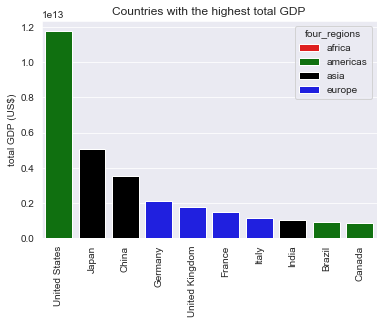

In [40]:
# Plotting the 10 wealthiest countries in a bar plot dependent on their GDP and income

GDP_top10 = total_GDP[['four_regions','2011']].sort_values('2011',ascending=False)[0:10]
GDP_top10.reset_index(level=0,inplace=True)

ax = sns.barplot('country','2011',data=GDP_top10,palette=region_pal,hue='four_regions',hue_order=_regions,dodge=False);
ax.set_xticklabels(labels = GDP_top10['country'],rotation=90)
ax.set_xlabel("")
ax.set_ylabel("total GDP (US$)")
ax.set_title( "Countries with the highest total GDP" );

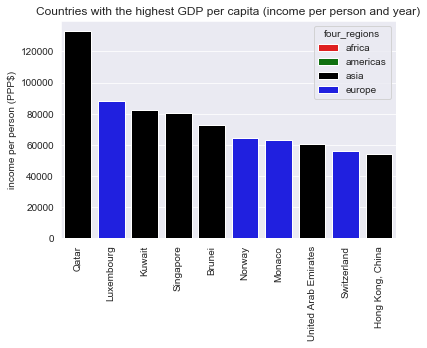

In [41]:
income_top10 = income[['four_regions','2015']].sort_values('2015',ascending=False)[0:10]
income_top10.reset_index(level=0,inplace=True)

ax = sns.barplot('country','2015',data=income_top10,palette=region_pal,hue='four_regions',hue_order=_regions,dodge=False);
ax.set_xticklabels(labels = income_top10['country'],rotation=90)
ax.set_xlabel("")
ax.set_ylabel("income per person (PPP$)")
ax.set_title( "Countries with the highest GDP per capita (income per person and year)" );

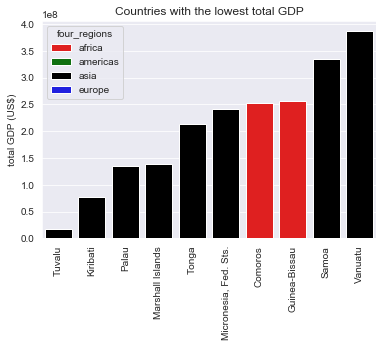

In [42]:
GDP_bottom10 = total_GDP[['four_regions','2011']].sort_values('2011',ascending=True)[0:10]
GDP_bottom10.reset_index(level=0,inplace=True)

ax = sns.barplot('country','2011',data=GDP_bottom10,palette=region_pal,hue='four_regions',hue_order=_regions,dodge=False);
ax.set_xticklabels(labels = GDP_bottom10['country'],rotation=90)
ax.set_xlabel("")
ax.set_ylabel("total GDP (US$)")
ax.set_title( "Countries with the lowest total GDP" );


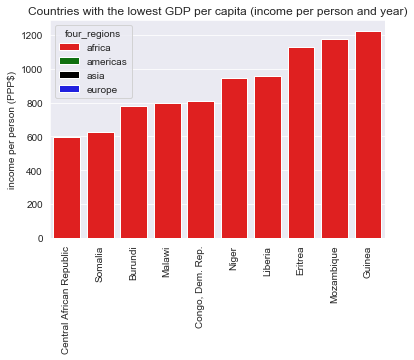

In [43]:
income_bottom10 = income[['four_regions','2015']].sort_values('2015',ascending=True)[0:10]
income_bottom10.reset_index(level=0,inplace=True)

ax = sns.barplot('country','2015',data=income_bottom10,palette=region_pal,hue='four_regions',hue_order=_regions,dodge=False);
ax.set_xticklabels(labels = income_bottom10['country'],rotation=90)
ax.set_xlabel("")
ax.set_ylabel("income per person (PPP$)")
ax.set_title( "Countries with the lowest GDP per capita (income per person and year)" );

In [45]:
# Statistics of income per person
income['2015'].describe()

count       196.000000
mean      17856.892857
std       19509.513400
min         599.000000
25%        3651.250000
50%       11672.500000
75%       24436.750000
max      132877.000000
Name: 2015, dtype: float64

In [46]:
# Statistics of total GDP
total_GDP['2011'].describe()

count    1.940000e+02
mean     2.255205e+11
std      9.786240e+11
min      1.673998e+07
25%      4.296557e+09
50%      1.603127e+10
75%      1.182507e+11
max      1.174422e+13
Name: 2011, dtype: float64

As we can see, there might be a huge geographical dependence on the economic power. The countries with the highest total GDP are usually highly developed industry nations with a large population, like the USA, Japan or Germany. However, we only find countries from America, Europe and Asia within this Top 10. Compared to the income per person (or GDP per capita), only asian and european countries can be found within the figure. You can also find small but rich countries like Switzerland, Singapur or Brunei. Since people with a high income are concentrated in big cities, the average income per person all over the country is very high. Thus, Qatar seems to be the wealthiest nation in the world with a GDP per capita of more than 120,000 PPP\$ In relation to that, the worlds mean income is around 18,000 PPP\$.

Compared to the wealthiest nations, the nations with the lowest GDP and income are usually from East Asia respectively pacific islands, like Tuvalu or Kiribati, or from Africa. It is quite understandable, that these small islands have also low GDPs because of their small population. As we compare the GDP per capita, we only have African nations within our figure, since the low GDP is shared by large populations. A lot of people of the depicted countries only less than one tenth of the worlds mean income per person.

So, let's take a look on the health indicators to analyze whether these aspects have influence on the populations health.

#### Health indicators

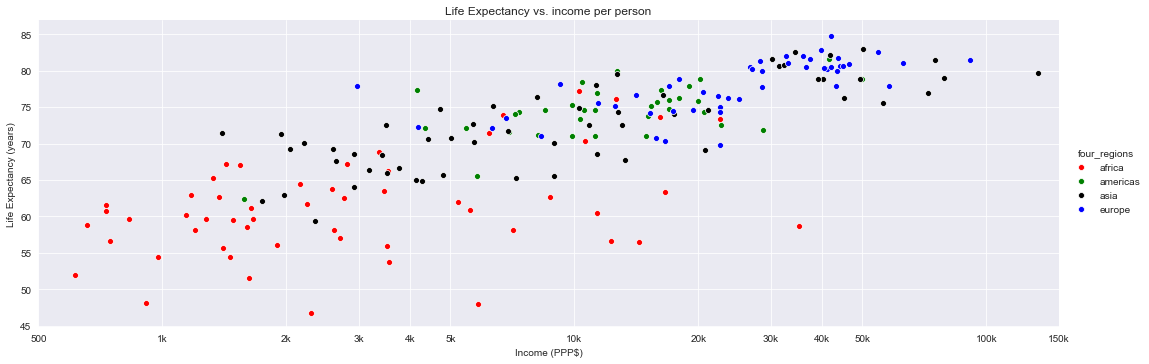

In [64]:
# Plot Life Expectancy vs. income per person
ax = sns.pairplot(health_indicators,hue='four_regions',y_vars='life_expectancy',x_vars='income',hue_order=_regions, palette = region_pal, kind="scatter", height = 5, aspect=3)
ax.set(xscale="log", yscale="linear")
plt.xlabel('Income (PPP$)')
plt.ylabel('Life Expectancy (years)')
plt.xlim([500,150000])
plt.xticks([500,1000,2000,3000,4000,5000,10000,20000, 30000, 40000, 50000,100000,150000],['500','1k','2k','3k','4k','5k','10k','20k','30k','40k','50k','100k','150k'])
plt.title('Life Expectancy vs. income per person')
plt.show()

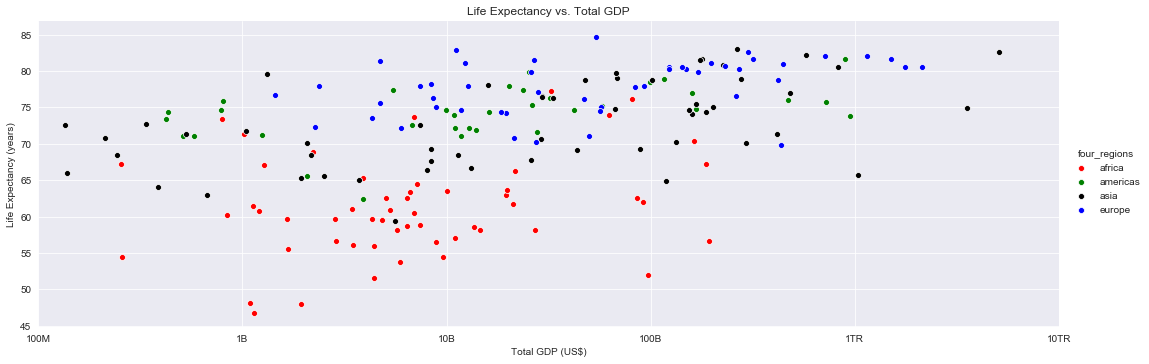

In [65]:
# Plot Life Expectancy vs. Total GDP
ax = sns.pairplot(health_indicators,hue='four_regions',y_vars='life_expectancy',x_vars='total_GDP',hue_order=_regions, palette = region_pal, kind="scatter", height = 5, aspect=3)
ax.set(xscale="log", yscale="linear")
plt.xlabel('Total GDP (US$)')
plt.ylabel('Life Expectancy (years)')
plt.xlim([1E8,1E13])
plt.xticks([1E8,1E9,1E10,1E11,1E12,1E13],['100M','1B','10B','100B','1TR','10TR'])
plt.title('Life Expectancy vs. Total GDP')
plt.show()

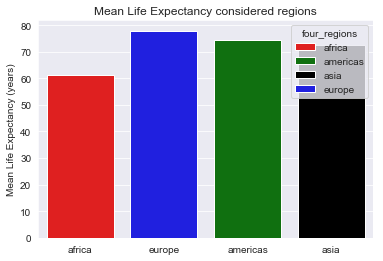

In [92]:
# Plotting the mean of the health indicators grouped by region
if 'four_regions' not in health_indicators_mean.columns:
    health_indicators_mean.reset_index(inplace=True)
    health_indicators_mean.rename(columns={'index':'four_regions'},inplace=True)
ax = sns.barplot(x='four_regions',y='life_expectancy',data=health_indicators_mean,palette=region_pal,hue='four_regions',hue_order=_regions,dodge=False);
ax.set_xlabel("")
ax.set_ylabel("Mean Life Expectancy (years)")
ax.set_title( "Mean Life Expectancy of considered regions" );

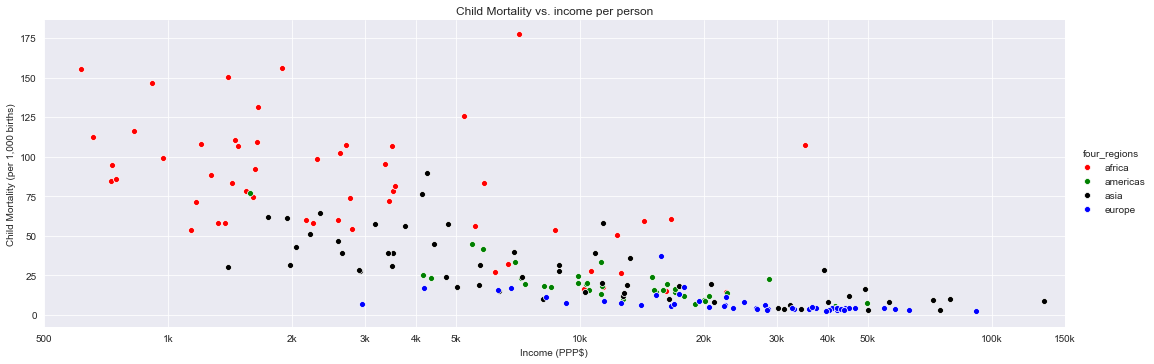

In [66]:
# Plot Child Mortality vs. income per person
ax = sns.pairplot(health_indicators,hue='four_regions',y_vars='child_mortality',x_vars='income',hue_order=_regions, palette = region_pal, kind="scatter", height = 5, aspect=3)
ax.set(xscale="log", yscale="linear")
plt.xlabel('Income (PPP$)')
plt.ylabel('Child Mortality (per 1,000 births)')
plt.xlim([500,150000])
plt.xticks([500,1000,2000,3000,4000,5000,10000,20000, 30000, 40000, 50000,100000,150000],['500','1k','2k','3k','4k','5k','10k','20k','30k','40k','50k','100k','150k'])
plt.title('Child Mortality vs. income per person')
plt.show()

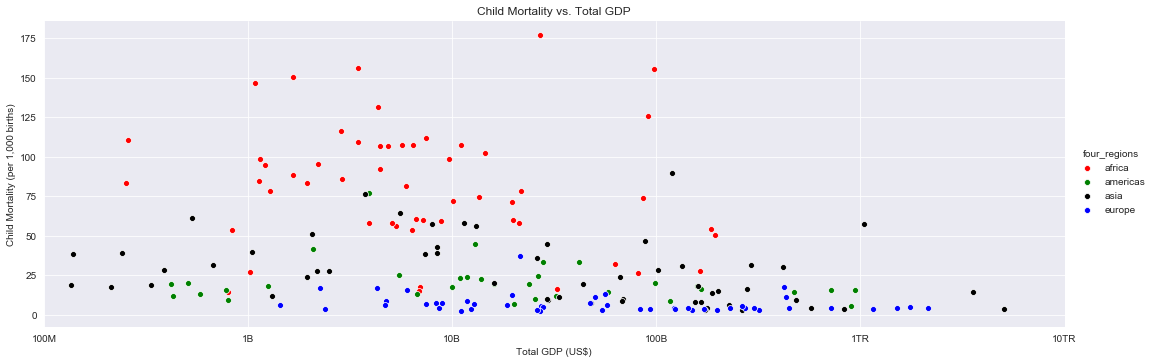

In [67]:
# Plot Child Mortality vs. Total GDP
ax = sns.pairplot(health_indicators,hue='four_regions',y_vars='child_mortality',x_vars='total_GDP',hue_order=_regions, palette = region_pal, kind="scatter", height = 5, aspect=3)
ax.set(xscale="log", yscale="linear")
plt.xlabel('Total GDP (US$)')
plt.ylabel('Child Mortality (per 1,000 births)')
plt.xlim([1E8,1E13])
plt.xticks([1E8,1E9,1E10,1E11,1E12,1E13],['100M','1B','10B','100B','1TR','10TR'])
plt.title('Child Mortality vs. Total GDP')
plt.show()

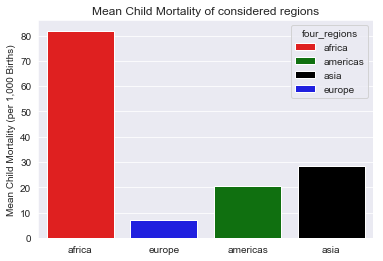

In [97]:
# Plotting the mean of the health indicators grouped by region
if 'four_regions' not in health_indicators_mean.columns:
    health_indicators_mean.reset_index(inplace=True)
    health_indicators_mean.rename(columns={'index':'four_regions'},inplace=True)
ax = sns.barplot(x='four_regions',y='child_mortality',data=health_indicators_mean,palette=region_pal,hue='four_regions',hue_order=_regions,dodge=False);
ax.set_xlabel("")
ax.set_ylabel("Mean Child Mortality (per 1,000 Births)")
ax.set_title( "Mean Child Mortality of considered regions" );

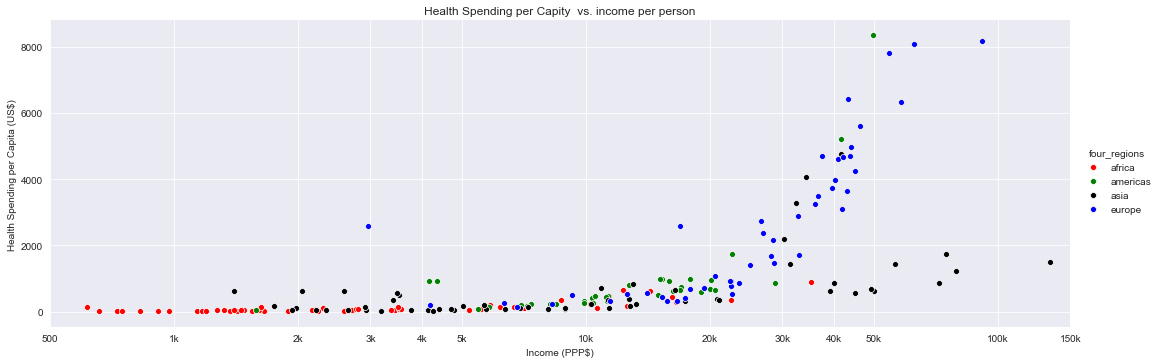

In [68]:
# Plot Health Spending vs. income per person
ax = sns.pairplot(health_indicators,hue='four_regions',y_vars='health_spending',x_vars='income',hue_order=_regions, palette = region_pal, kind="scatter", height = 5, aspect=3)
ax.set(xscale="log", yscale="linear")
plt.xlabel('Income (PPP$)')
plt.ylabel('Health Spending per Capita (US$)')
plt.xlim([500,150000])
plt.xticks([500,1000,2000,3000,4000,5000,10000,20000, 30000, 40000, 50000,100000,150000],['500','1k','2k','3k','4k','5k','10k','20k','30k','40k','50k','100k','150k'])
plt.title('Health Spending per Capity  vs. income per person')
plt.show()

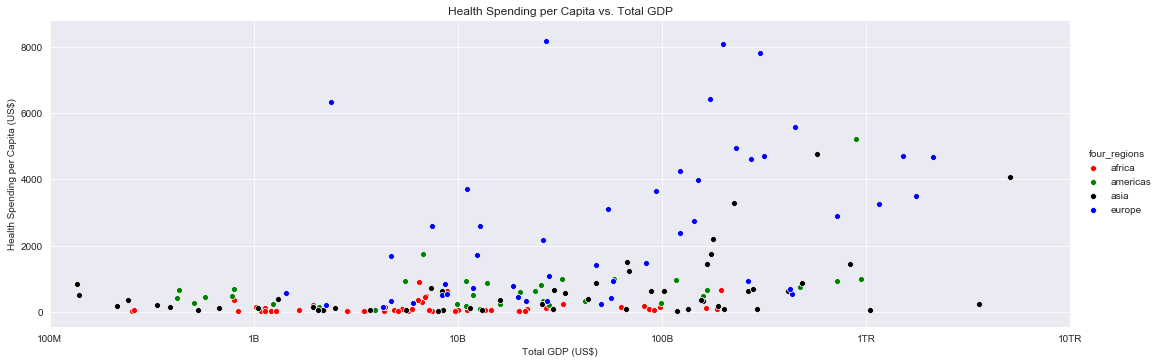

In [69]:
# Plot Health Spending vs. Total GDP
ax = sns.pairplot(health_indicators,hue='four_regions',y_vars='health_spending',x_vars='total_GDP',hue_order=_regions, palette = region_pal, kind="scatter", height = 5, aspect=3)
ax.set(xscale="log", yscale="linear")
plt.xlabel('Total GDP (US$)')
plt.ylabel('Health Spending per Capita (US$)')
plt.xlim([1E8,1E13])
plt.xticks([1E8,1E9,1E10,1E11,1E12,1E13],['100M','1B','10B','100B','1TR','10TR'])
plt.title('Health Spending per Capita vs. Total GDP')
plt.show()

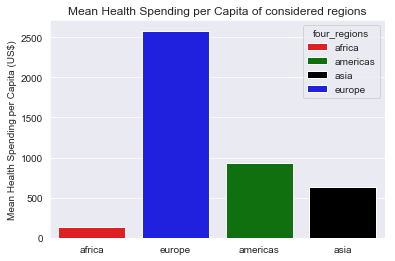

In [94]:
# Plotting the mean of the health indicators grouped by region
if 'four_regions' not in health_indicators_mean.columns:
    health_indicators_mean.reset_index(inplace=True)
    health_indicators_mean.rename(columns={'index':'four_regions'},inplace=True)
ax = sns.barplot(x='four_regions',y='health_spending',data=health_indicators_mean,palette=region_pal,hue='four_regions',hue_order=_regions,dodge=False);
ax.set_xlabel("")
ax.set_ylabel("Mean Health Spending per Capita (US$)")
ax.set_title( "Mean Health Spending per Capita of considered regions" );

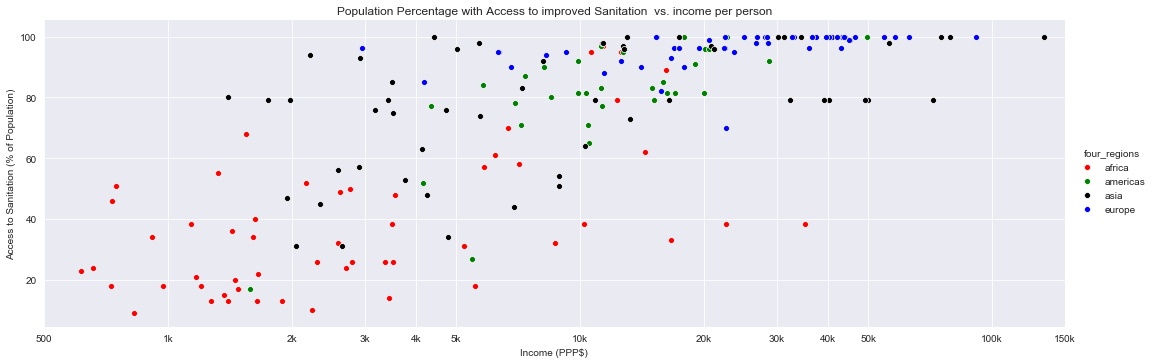

In [70]:
# Plot Sanitation vs. income per person
ax = sns.pairplot(health_indicators,hue='four_regions',y_vars='sanitation',x_vars='income',hue_order=_regions, palette = region_pal, kind="scatter", height = 5, aspect=3)
ax.set(xscale="log", yscale="linear")
plt.xlabel('Income (PPP$)')
plt.ylabel('Access to Sanitation (% of Population)')
plt.xlim([500,150000])
plt.xticks([500,1000,2000,3000,4000,5000,10000,20000, 30000, 40000, 50000,100000,150000],['500','1k','2k','3k','4k','5k','10k','20k','30k','40k','50k','100k','150k'])
plt.title('Population Percentage with Access to improved Sanitation  vs. income per person')
plt.show()

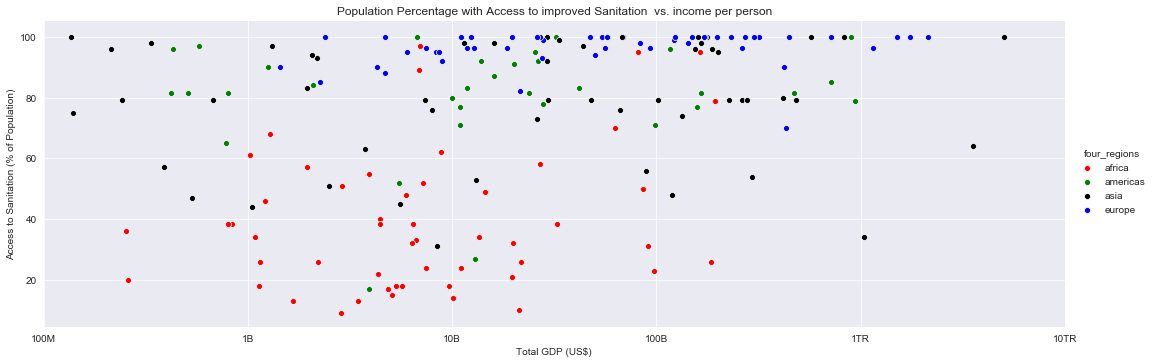

In [71]:
# Plot Sanitation vs. Total GDP
ax = sns.pairplot(health_indicators,hue='four_regions',y_vars='sanitation',x_vars='total_GDP',hue_order=_regions, palette = region_pal, kind="scatter", height = 5, aspect=3)
ax.set(xscale="log", yscale="linear")
plt.xlabel('Total GDP (US$)')
plt.ylabel('Access to Sanitation (% of Population)')
plt.xlim([1E8,1E13])
plt.xticks([1E8,1E9,1E10,1E11,1E12,1E13],['100M','1B','10B','100B','1TR','10TR'])
plt.title('Population Percentage with Access to improved Sanitation  vs. income per person')
plt.show()

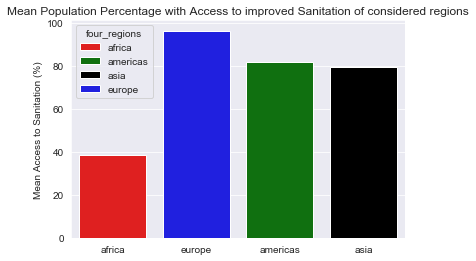

In [95]:
# Plotting the mean of the health indicators grouped by region
if 'four_regions' not in health_indicators_mean.columns:
    health_indicators_mean.reset_index(inplace=True)
    health_indicators_mean.rename(columns={'index':'four_regions'},inplace=True)
ax = sns.barplot(x='four_regions',y='sanitation',data=health_indicators_mean,palette=region_pal,hue='four_regions',hue_order=_regions,dodge=False);
ax.set_xlabel("")
ax.set_ylabel("Mean Access to Sanitation (%)")
ax.set_title( "Mean Population Percentage with Access to improved Sanitation of considered regions" );

In [99]:
health_indicators.describe()

,income,total_GDP,life_expectancy,child_mortality,health_spending,sanitation
count,194.000000,1.940000e+02,194.000000,194.000000,194.000000,194.000000
mean,16993.817010,2.255205e+11,71.031125,36.573900,1030.462087,72.525556
std,19159.948136,9.786240e+11,8.393916,37.797232,1688.956350,28.854449
min,614.000000,1.673998e+07,46.700000,2.300000,11.903500,9.000000
25%,3456.500000,4.296557e+09,65.300000,8.250000,85.428087,50.250000
50%,10582.000000,1.603127e+10,72.650000,19.450000,363.755517,81.551724
75%,22549.500000,1.182507e+11,77.700000,57.200000,927.449495,97.000000
max,133734.000000,1.174422e+13,84.700000,177.300000,8361.732117,100.000000


In general, we can see that the plotting versus income gives us a better correlation of the data. This is because of the fact that a lot of third world countries have a large population, which has a certain share in the GDP and the economy. However, the allocated GDP over the population (GDP per capita) is quite small.
To visualize differences between the countries and especially the income and GDP, the x-axis is plotted at logarithmic scale.

The life expectancy is clearly dependent on the economic power of a country. There is a clear positive correlation between the life expectancy and the income per person, which seems to be exponential, since the logarithmic scale shows a linear relationship. Furthermore the comparison with the total GDP plot and the figure of the life expectancy by region show a geographical dependence. With a few exceptions, people from Europe live on average around 15 years longer than people in Africa. Even the life expectancy in American and Asian countries are on average over 70 years, which is also the worldwide mean.

The child mortality comparison shows a similar result. African countries have an exorbitant higher child mortality (around 8 %) than the other three regions in the world. The worldwide mean child mortality is around 3.66 % as shown in the table above. Considering the income per person of each country, we can see that there is a negative correlation between child mortality and income. In spite of a relatively high income, some African nations also suffer from high child mortality. Thus, low income or GDP is not the only reason for this issue.

Some reasons might be seen in the spending for medical treatment or the access to improved sanitation infrastructures, since African countries are on average far below the mean of 1,030 US\$ per person and year for health spending (mean health spending of Africa is around 134 US\$) respectively 72.5% for access to improved sanitation (African mean: 38.4%).

In [100]:
health_indicators_mean.head()

,four_regions,income,total_GDP,life_expectancy,child_mortality,health_spending,sanitation
0,africa,5078.83,2.39019e+10,61.1926,81.9037,134.744,38.3878
1,europe,29286.8,2.41054e+11,77.8977,7.15,2580.82,96.325
2,americas,14540.5,4.48026e+11,74.3706,20.4857,930.895,81.5517
3,asia,19436.1,2.66821e+11,72.5189,28.2866,634.608,79.2826


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!